**Title**: EXPLORATORY DATA ANALYSIS

**Description**: Exploring the skills and job history datasets to generate important insights

**Author**: Benedict Ibe

**Date Created**: 14/07/2023

In [78]:
import nltk

StatementMeta(Nurture, 1299, 2, Finished, Available)

In [79]:
pip install seaborn

StatementMeta(Nurture, 1299, 3, Finished, Available)

Note: you may need to restart the kernel to use updated packages.


In [80]:
%%pyspark

spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
candidate_skilllevel= spark.sql("SELECT \
Id                                          as Cand_ID, \
recruit_candidatecontact                    as Candidate_contactno, \
crimson_proficiency                         as Cand_proficiency, \
crimson_requirement                         as Cand_requirement, \
crimson_experience                          as Cand_experience, \
crimson_experienceperiod                    as Cand_exp_period, \
crimson_skill                               as Cand_skill, \
crimson_name                                as Cand_name, \
crimson_skilllevelid                        as Cand_skilllevel_ID, \
lower(crimson_skillname)                    as Cand_skill_name, \
crimson_level                               as Cand_level \
FROM dataverse_edensmithcon_org87f26120.crimson_skilllevel")

StatementMeta(Nurture, 1299, 4, Finished, Available)

In [81]:
%%pyspark

spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
candidate_workhist =spark.sql("SELECT \
Id                                  as ID , \
recruit_candidatecontact            as Candidate_contact,\
crimson_startdate                   as Candidate_workstrt_date,\
crimson_enddate                     as Candidate_workend_date, \
crimson_workhistoryid               as WorkHistory_ID,\
lower(crimson_description)          as Candidate_work_description,\
crimson_jobtitle                    as Candidate_job_title ,\
crimson_name                        as Cand_workplace \
FROM dataverse_edensmithcon_org87f26120.crimson_workhistory")

StatementMeta(Nurture, 1299, 5, Finished, Available)

In [82]:
candidate_skilllevel.show()

StatementMeta(Nurture, 1299, 6, Finished, Available)

+--------------------+--------------------+----------------+----------------+---------------+---------------+--------------------+---------+--------------------+--------------------+----------+
|             Cand_ID| Candidate_contactno|Cand_proficiency|Cand_requirement|Cand_experience|Cand_exp_period|          Cand_skill|Cand_name|  Cand_skilllevel_ID|     Cand_skill_name|Cand_level|
+--------------------+--------------------+----------------+----------------+---------------+---------------+--------------------+---------+--------------------+--------------------+----------+
|ab1e9a1d-104e-eb1...|03c6701e-104e-eb1...|       143570003|       143570000|             43|      143570000|089ac1e6-27bd-ea1...|     null|ab1e9a1d-104e-eb1...|                gdpr|        97|
|ae1e9a1d-104e-eb1...|03c6701e-104e-eb1...|       143570003|       143570000|             43|      143570000|9f9fc31c-8a59-e11...|     null|ae1e9a1d-104e-eb1...|    data warehousing|        99|
|b51e9a1d-104e-eb1...|03c6701e

In [83]:
candidate_skilllevel.summary()

StatementMeta(Nurture, 1299, 7, Finished, Available)

DataFrame[summary: string, Cand_ID: string, Candidate_contactno: string, Cand_proficiency: string, Cand_requirement: string, Cand_experience: string, Cand_exp_period: string, Cand_skill: string, Cand_name: string, Cand_skilllevel_ID: string, Cand_skill_name: string, Cand_level: string]

In [84]:
candidate_skilllevel.printSchema()

StatementMeta(Nurture, 1299, 8, Finished, Available)

root
 |-- Cand_ID: string (nullable = true)
 |-- Candidate_contactno: string (nullable = true)
 |-- Cand_proficiency: long (nullable = true)
 |-- Cand_requirement: long (nullable = true)
 |-- Cand_experience: long (nullable = true)
 |-- Cand_exp_period: long (nullable = true)
 |-- Cand_skill: string (nullable = true)
 |-- Cand_name: string (nullable = true)
 |-- Cand_skilllevel_ID: string (nullable = true)
 |-- Cand_skill_name: string (nullable = true)
 |-- Cand_level: long (nullable = true)



In [85]:
candidate_skilllevel.describe().show()

StatementMeta(Nurture, 1299, 9, Finished, Available)

+-------+--------------------+--------------------+--------------------+----------------+------------------+--------------------+--------------------+---------+--------------------+-----------------+-----------------+
|summary|             Cand_ID| Candidate_contactno|    Cand_proficiency|Cand_requirement|   Cand_experience|     Cand_exp_period|          Cand_skill|Cand_name|  Cand_skilllevel_ID|  Cand_skill_name|       Cand_level|
+-------+--------------------+--------------------+--------------------+----------------+------------------+--------------------+--------------------+---------+--------------------+-----------------+-----------------+
|  count|              187910|              187910|              114335|          187910|            187909|              103028|              187903|        0|              187910|           187903|           187904|
|   mean|                null|                null|1.4357000168471596E8|        1.4357E8|22.471137625127056|1.4357000000896844E8

In [86]:
candidate_skilllevel.select('Cand_proficiency', 'Cand_requirement', 'Cand_experience', 'Cand_exp_period', 'Cand_level')

StatementMeta(Nurture, 1299, 10, Finished, Available)

DataFrame[Cand_proficiency: bigint, Cand_requirement: bigint, Cand_experience: bigint, Cand_exp_period: bigint, Cand_level: bigint]

In [87]:
candidate_skilllevel.show(10)

StatementMeta(Nurture, 1299, 11, Finished, Available)

+--------------------+--------------------+----------------+----------------+---------------+---------------+--------------------+---------+--------------------+--------------------+----------+
|             Cand_ID| Candidate_contactno|Cand_proficiency|Cand_requirement|Cand_experience|Cand_exp_period|          Cand_skill|Cand_name|  Cand_skilllevel_ID|     Cand_skill_name|Cand_level|
+--------------------+--------------------+----------------+----------------+---------------+---------------+--------------------+---------+--------------------+--------------------+----------+
|ab1e9a1d-104e-eb1...|03c6701e-104e-eb1...|       143570003|       143570000|             43|      143570000|089ac1e6-27bd-ea1...|     null|ab1e9a1d-104e-eb1...|                gdpr|        97|
|ae1e9a1d-104e-eb1...|03c6701e-104e-eb1...|       143570003|       143570000|             43|      143570000|9f9fc31c-8a59-e11...|     null|ae1e9a1d-104e-eb1...|    data warehousing|        99|
|b51e9a1d-104e-eb1...|03c6701e

In [88]:
df2 = candidate_skilllevel.select('Cand_ID', 'Cand_proficiency', 'Cand_experience', 'Cand_skill_name', 'Cand_level')
df2.show()

StatementMeta(Nurture, 1299, 12, Finished, Available)

+--------------------+----------------+---------------+--------------------+----------+
|             Cand_ID|Cand_proficiency|Cand_experience|     Cand_skill_name|Cand_level|
+--------------------+----------------+---------------+--------------------+----------+
|ab1e9a1d-104e-eb1...|       143570003|             43|                gdpr|        97|
|ae1e9a1d-104e-eb1...|       143570003|             43|    data warehousing|        99|
|b51e9a1d-104e-eb1...|       143570003|             62|    business objects|        95|
|90b1b823-104e-eb1...|       143570002|             19|              oracle|        70|
|15c6701e-104e-eb1...|       143570002|             19|         oracle 2000|        70|
|98b1b823-104e-eb1...|       143570002|             19|            oracle 7|        70|
|9db1b823-104e-eb1...|       143570002|             19|            oracle 9|        70|
|9fb1b823-104e-eb1...|       143570002|             19|businessobjects w...|        65|
|b79cff24-104e-eb1...|       143

It means that the skills listed in the dataframe for each candidate is unique from the count frequency results. That is to say each candidate with a candidate id has a seperate skill

In [89]:
grouped_df = df2.groupBy("Cand_ID", "Cand_proficiency", "Cand_experience", "Cand_skill_name", "Cand_level").count().sort('count', ascending=False)
grouped_df.show()

StatementMeta(Nurture, 1299, 13, Finished, Available)

+--------------------+----------------+---------------+--------------------+----------+-----+
|             Cand_ID|Cand_proficiency|Cand_experience|     Cand_skill_name|Cand_level|count|
+--------------------+----------------+---------------+--------------------+----------+-----+
|332e8005-b34e-eb1...|       143570000|            168|      connect:direct|        24|    1|
|fa30df07-b34e-eb1...|       143570000|            161|mercator integrat...|        24|    1|
|03b81636-7d4f-eb1...|       143570003|             29|                 etl|        95|    1|
|4246e3f7-af51-eb1...|       143570003|             20|             jupyter|        93|    1|
|7fba7251-b151-eb1...|       143570003|             32|              docker|       100|    1|
|25e30ec1-b251-eb1...|       143570003|             68|                  ad|        93|    1|
|d4f585cd-b251-eb1...|       143570003|             16|    data warehousing|        94|    1|
|87a77dd9-b251-eb1...|       143570000|             38|     

In [90]:
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

StatementMeta(Nurture, 1299, 14, Finished, Available)

In [91]:
#Define the search Parameter
skillName = 'data'

StatementMeta(Nurture, 1299, 15, Finished, Available)

In [92]:
#Search for the wild character defined
grouped_df2 = (grouped_df
               .filter(grouped_df.Cand_skill_name.rlike(skillName))
               .select("Cand_skill_name")
               .distinct()
               .sort("Cand_skill_name"))
grouped_df2.show(30,truncate=False)

StatementMeta(Nurture, 1299, 16, Finished, Available)

+-------------------------------+
|Cand_skill_name                |
+-------------------------------+
|aqua data studio er modeler    |
|ascential datastage            |
|azure data factory             |
|big data                       |
|businessobjects data integrator|
|ca-datacom                     |
|certified data processor (cdp) |
|customer data integration      |
|data access object             |
|data analysis                  |
|data architecture              |
|data centre                    |
|data engineering               |
|data entry                     |
|data lake                      |
|data management                |
|data migration                 |
|data mining                    |
|data modelling                 |
|data privacy                   |
|data protection                |
|data quality                   |
|data reconciliation            |
|data science                   |
|data strategy                  |
|data transformation services   |
|data warehous

In [93]:
pandas_df = grouped_df2.toPandas()

StatementMeta(Nurture, 1299, 17, Finished, Available)

text = ' '.join(pandas_df['Cand_skill_name'].tolist())

In [94]:
#Group by the candidate skill name
grouped_skill = df2.groupBy("Cand_skill_name").count().sort('count', ascending=False)
grouped_skill.show(50)

StatementMeta(Nurture, 1299, 18, Finished, Available)

+--------------------+-----+
|     Cand_skill_name|count|
+--------------------+-----+
|                 sql| 3148|
|  python programming| 2437|
|     microsoft excel| 2004|
|            power bi| 1934|
|                 etl| 1893|
|microsoft sql server| 1850|
|             tableau| 1848|
|    data warehousing| 1778|
|   agile methodology| 1682|
|              master| 1640|
|      data modelling| 1631|
|              oracle| 1631|
|               azure| 1597|
|windows azure pla...| 1591|
|            engineer| 1550|
|business intellig...| 1463|
|  project management| 1454|
|    machine learning| 1412|
|                 aws| 1403|
|            big data| 1369|
|     data management| 1291|
|                 sas| 1255|
|        data quality| 1250|
|            oracle 7| 1110|
|            oracle 9| 1108|
|         oracle 2000| 1100|
|sql server integr...| 1097|
|                ssis| 1096|
|bachelors degree ...| 1086|
|   microsoft windows| 1085|
|      data migration| 1070|
|requirements 

In [95]:
grouped_skill_pd = grouped_skill.toPandas()

StatementMeta(Nurture, 1299, 19, Finished, Available)

In [96]:
#Group by the candidate job title
grouped_jobHistory = candidate_workhist.groupBy("Candidate_job_title").count().sort('count', ascending=False)
grouped_jobHistory.show(50)

StatementMeta(Nurture, 1299, 20, Finished, Available)

+--------------------+-----+
| Candidate_job_title|count|
+--------------------+-----+
|        Data Analyst|  577|
|    Business Analyst|  498|
|      Data Scientist|  395|
|       Data Engineer|  353|
|        BI Developer|  251|
|          Consultant|  216|
|      Data Architect|  213|
|   Software Engineer|  184|
|     Project Manager|  158|
|Senior Business A...|  155|
|           Developer|  149|
|Senior Data Engineer|  146|
|  Solution Architect|  136|
|       BI Consultant|  133|
|             Analyst|  126|
|  Software Developer|  125|
|Business Intellig...|  118|
|            Director|  112|
|Senior Data Scien...|  104|
|Senior Software E...|  103|
|             Manager|   99|
|   Senior Consultant|   97|
|       SQL Developer|   88|
|    Senior Developer|   85|
|      Technical Lead|   78|
|Business Intellig...|   78|
| Senior Data Analyst|   77|
| Solutions Architect|   72|
|Business Data Ana...|   71|
|  Analyst Programmer|   71|
|  Database Developer|   70|
| Technical Ar

In [97]:
grouped_jobHistory_pd = grouped_jobHistory.toPandas()

StatementMeta(Nurture, 1299, 21, Finished, Available)

StatementMeta(Nurture, 1299, 22, Finished, Available)

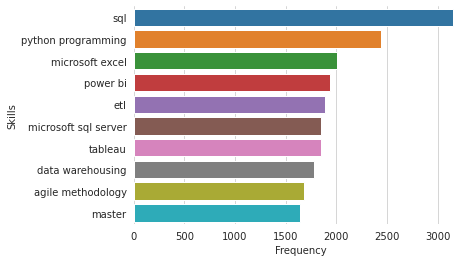

In [98]:
#Plot the grouped skill names in a horizontal bar plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.barplot(x='count', y='Cand_skill_name', data=grouped_skill_pd.head(10))
plt.xlabel('Frequency')
plt.ylabel('Skills')
sns.despine(left=True, bottom=True)

StatementMeta(Nurture, 1299, 23, Finished, Available)

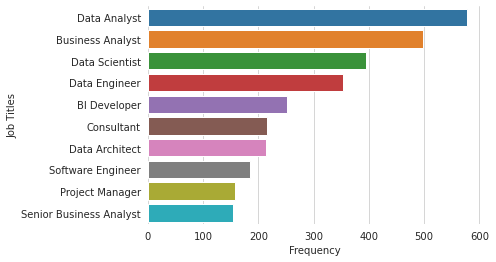

In [99]:
#Plot the grouped jo title in a horizontal bar plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.barplot(x='count', y='Candidate_job_title', data=grouped_jobHistory_pd.head(10))
plt.xlabel('Frequency')
plt.ylabel('Job Titles')
sns.despine(left=True, bottom=True)

In [100]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

StatementMeta(Nurture, 1299, 24, Finished, Available)

In [101]:
skill_features = candidate_skilllevel.select('Cand_proficiency', 'Cand_requirement', 'Cand_experience', 'Cand_exp_period', 'Cand_level')
skill_features.show()

StatementMeta(Nurture, 1299, 25, Finished, Available)

+----------------+----------------+---------------+---------------+----------+
|Cand_proficiency|Cand_requirement|Cand_experience|Cand_exp_period|Cand_level|
+----------------+----------------+---------------+---------------+----------+
|       143570003|       143570000|             43|      143570000|        97|
|       143570003|       143570000|             43|      143570000|        99|
|       143570003|       143570000|             62|      143570000|        95|
|       143570002|       143570000|             19|      143570000|        70|
|       143570002|       143570000|             19|      143570000|        70|
|       143570002|       143570000|             19|      143570000|        70|
|       143570002|       143570000|             19|      143570000|        70|
|       143570002|       143570000|             19|      143570000|        65|
|       143570002|       143570000|             19|      143570000|        65|
|       143570003|       143570000|             16| 

In [102]:
skill_featuresPD = skill_features.toPandas()
skill_featuresPD

StatementMeta(Nurture, 1299, 26, Finished, Available)

,Cand_proficiency,Cand_requirement,Cand_experience,Cand_exp_period,Cand_level
0,143570003.0,143570000,43.0,143570000.0,97.0
1,143570003.0,143570000,43.0,143570000.0,99.0
2,143570003.0,143570000,62.0,143570000.0,95.0
3,143570002.0,143570000,19.0,143570000.0,70.0
4,143570002.0,143570000,19.0,143570000.0,70.0
...,...,...,...,...,...
187905,NaN,143570000,0.0,NaN,14.0
187906,NaN,143570000,0.0,NaN,14.0
187907,143570002.0,143570000,30.0,143570000.0,75.0
187908,143570000.0,143570000,2.0,143570000.0,23.0


In [103]:
#Remove null values from the dataframe
skill_featuresPD2 = skill_featuresPD.dropna()

StatementMeta(Nurture, 1299, 27, Finished, Available)

StatementMeta(Nurture, 1299, 28, Finished, Available)

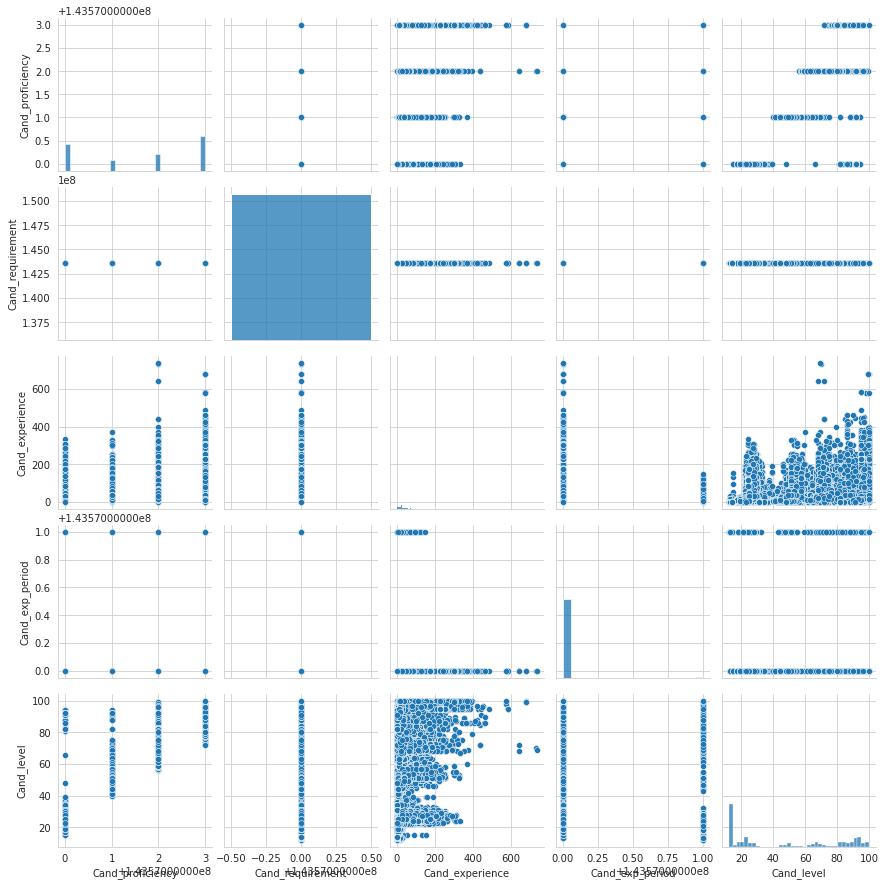

In [104]:
#Plot a pair plot with seaborn to show relationship between variables
sns.pairplot(data=skill_featuresPD,vars=['Cand_proficiency', 'Cand_requirement', 'Cand_experience', 'Cand_exp_period', 'Cand_level'],diag_kind='hist')
plt.show()

StatementMeta(Nurture, 1299, 29, Finished, Available)

/home/trusted-service-user/cluster-env/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/trusted-service-user/cluster-env/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 143570000.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/trusted-service-user/cluster-env/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 143570000.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/trusted-service-user/cluster-env/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: 

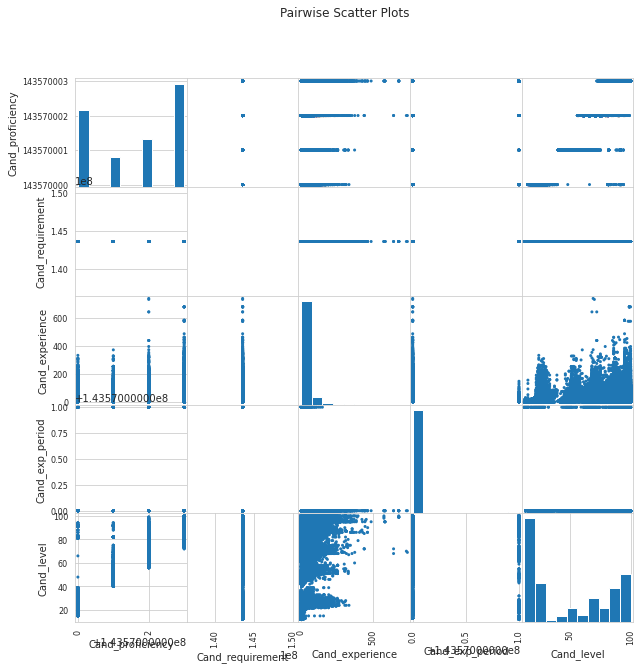

In [105]:
#Plot a pair plot with matplotlib to show relationship between variables
scatter_matrix(skill_featuresPD, figsize=(10, 10), diagonal='hist', alpha=1)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

StatementMeta(Nurture, 1299, 30, Finished, Available)

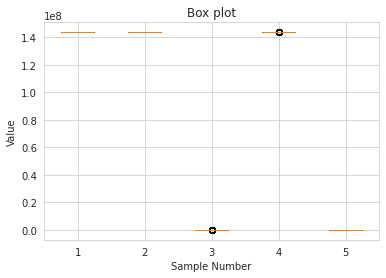

In [106]:
#Plot a boxplot to investigate the presence of outliers
plt.boxplot(skill_featuresPD2)
plt.title('Box plot')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

StatementMeta(Nurture, 1299, 31, Finished, Available)

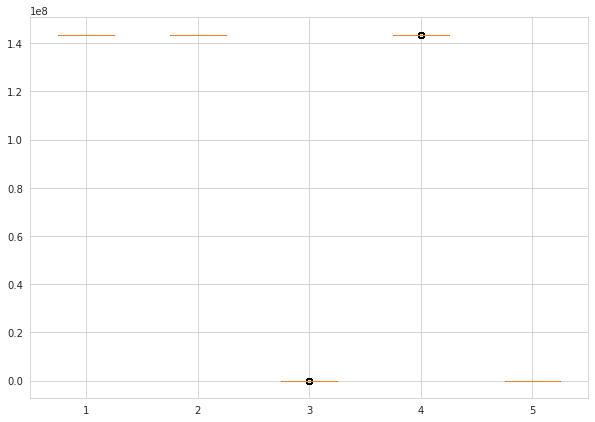

In [107]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(skill_featuresPD2)

# show plot
plt.show()

StatementMeta(Nurture, 1299, 32, Finished, Available)

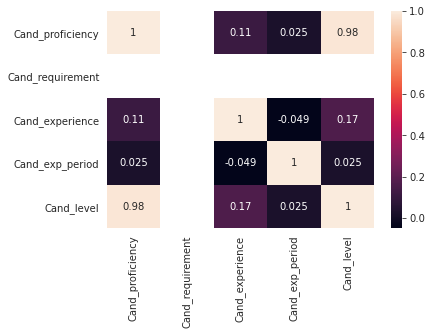

In [108]:
#Plot a correlation matrix to calculat the extent of relationship
ax = sns.heatmap(skill_featuresPD2.corr(), annot=True)

In [109]:
#Serch the skill dataframe for the presence of a wild character(Finance)
data = df2.filter(df2.Cand_skill_name.rlike('finance')).sort(df2.Cand_skill_name.asc())
data.show(50, truncate = False)

StatementMeta(Nurture, 1299, 33, Finished, Available)

+------------------------------------+----------------+---------------+-----------------------------------+----------+
|Cand_ID                             |Cand_proficiency|Cand_experience|Cand_skill_name                    |Cand_level|
+------------------------------------+----------------+---------------+-----------------------------------+----------+
|b95689ad-6761-eb11-a812-0022481a613a|null            |0              |acquisition finance                |13        |
|72fabd46-1daf-eb11-8236-00224800e64b|null            |0              |chartered public finance accountant|82        |
|76b85ff9-23a4-eb11-b1ac-000d3a86d6ec|null            |0              |chartered public finance accountant|82        |
|9f96de78-ebc5-ea11-a812-000d3a0cc0cf|null            |0              |chartered public finance accountant|82        |
|43e017f4-c51d-eb11-a813-000d3a86ac4e|143570003       |14             |corporate finance                  |85        |
|098e8cc2-9898-ec11-b400-000d3a0cd2ec|null      

In [110]:
candidate_workhist.show()

StatementMeta(Nurture, 1299, 34, Finished, Available)

+--------------------+--------------------+-----------------------+----------------------+--------------------+--------------------------+--------------------+--------------------+
|                  ID|   Candidate_contact|Candidate_workstrt_date|Candidate_workend_date|      WorkHistory_ID|Candidate_work_description| Candidate_job_title|      Cand_workplace|
+--------------------+--------------------+-----------------------+----------------------+--------------------+--------------------------+--------------------+--------------------+
|6ae7162b-104e-eb1...|14c6701e-104e-eb1...|    2019-05-01 00:00:00|   2020-08-01 00:00:00|6ae7162b-104e-eb1...|      ; lendinvest - --...|        Data analyst|Data analyst - Le...|
|44e4bc29-104e-eb1...|03c6701e-104e-eb1...|    2017-01-01 00:00:00|                  null|44e4bc29-104e-eb1...|      key achievements\...|Reporting and Dat...|Reporting and Dat...|
|71e7162b-104e-eb1...|14c6701e-104e-eb1...|    2018-04-01 00:00:00|   2019-05-01 00:00:00|71e71

In [111]:
candidate_workhist.printSchema()

StatementMeta(Nurture, 1299, 35, Finished, Available)

root
 |-- ID: string (nullable = true)
 |-- Candidate_contact: string (nullable = true)
 |-- Candidate_workstrt_date: timestamp (nullable = true)
 |-- Candidate_workend_date: timestamp (nullable = true)
 |-- WorkHistory_ID: string (nullable = true)
 |-- Candidate_work_description: string (nullable = true)
 |-- Candidate_job_title: string (nullable = true)
 |-- Cand_workplace: string (nullable = true)



In [112]:
candidate_workhist.describe().show()

StatementMeta(Nurture, 1299, 36, Finished, Available)

+-------+--------------------+--------------------+--------------------+--------------------------+--------------------+--------------------+
|summary|                  ID|   Candidate_contact|      WorkHistory_ID|Candidate_work_description| Candidate_job_title|      Cand_workplace|
+-------+--------------------+--------------------+--------------------+--------------------------+--------------------+--------------------+
|  count|               31777|               31777|               31777|                     28098|               31777|               31765|
|   mean|                null|                null|                null|                      null|                null|                null|
| stddev|                null|                null|                null|                      null|                null|                null|
|    min|00014d10-3d8d-ed1...|0002a3f0-ddf1-ea1...|00014d10-3d8d-ed1...|      ! kastle universa...|(.NET and SQL Dat...|(.NET and SQL Dat...|
|    m

In [113]:
from pyspark.sql.functions import to_date

StatementMeta(Nurture, 1299, 37, Finished, Available)

In [114]:
#Convert the start date to date format
df_hist = candidate_workhist.withColumn("Cnd_start_date", to_date("Candidate_workstrt_date"))
df_hist.show()

StatementMeta(Nurture, 1299, 38, Finished, Available)

+--------------------+--------------------+-----------------------+----------------------+--------------------+--------------------------+--------------------+--------------------+--------------+
|                  ID|   Candidate_contact|Candidate_workstrt_date|Candidate_workend_date|      WorkHistory_ID|Candidate_work_description| Candidate_job_title|      Cand_workplace|Cnd_start_date|
+--------------------+--------------------+-----------------------+----------------------+--------------------+--------------------------+--------------------+--------------------+--------------+
|6ae7162b-104e-eb1...|14c6701e-104e-eb1...|    2019-05-01 00:00:00|   2020-08-01 00:00:00|6ae7162b-104e-eb1...|      ; lendinvest - --...|        Data analyst|Data analyst - Le...|    2019-05-01|
|44e4bc29-104e-eb1...|03c6701e-104e-eb1...|    2017-01-01 00:00:00|                  null|44e4bc29-104e-eb1...|      key achievements\...|Reporting and Dat...|Reporting and Dat...|    2017-01-01|
|71e7162b-104e-eb1..

In [115]:
#Convert the end date to date format
df_hist2 = df_hist.withColumn("Cnd_end_date", to_date("Candidate_workend_date"))
df_hist2.show()

StatementMeta(Nurture, 1299, 39, Finished, Available)

+--------------------+--------------------+-----------------------+----------------------+--------------------+--------------------------+--------------------+--------------------+--------------+------------+
|                  ID|   Candidate_contact|Candidate_workstrt_date|Candidate_workend_date|      WorkHistory_ID|Candidate_work_description| Candidate_job_title|      Cand_workplace|Cnd_start_date|Cnd_end_date|
+--------------------+--------------------+-----------------------+----------------------+--------------------+--------------------------+--------------------+--------------------+--------------+------------+
|6ae7162b-104e-eb1...|14c6701e-104e-eb1...|    2019-05-01 00:00:00|   2020-08-01 00:00:00|6ae7162b-104e-eb1...|      ; lendinvest - --...|        Data analyst|Data analyst - Le...|    2019-05-01|  2020-08-01|
|44e4bc29-104e-eb1...|03c6701e-104e-eb1...|    2017-01-01 00:00:00|                  null|44e4bc29-104e-eb1...|      key achievements\...|Reporting and Dat...|Repor

In [116]:
#Select the required columns
df_hist3 = df_hist2.select('ID', 'WorkHistory_ID', 'Candidate_job_title', 'Cnd_start_date', 'Cnd_end_date')
df_hist3.show()

StatementMeta(Nurture, 1299, 40, Finished, Available)

+--------------------+--------------------+--------------------+--------------+------------+
|                  ID|      WorkHistory_ID| Candidate_job_title|Cnd_start_date|Cnd_end_date|
+--------------------+--------------------+--------------------+--------------+------------+
|6ae7162b-104e-eb1...|6ae7162b-104e-eb1...|        Data analyst|    2019-05-01|  2020-08-01|
|44e4bc29-104e-eb1...|44e4bc29-104e-eb1...|Reporting and Dat...|    2017-01-01|        null|
|71e7162b-104e-eb1...|71e7162b-104e-eb1...|             analyst|    2018-04-01|  2019-05-01|
|76e7162b-104e-eb1...|76e7162b-104e-eb1...|Data and Process ...|    2015-07-01|  2017-01-01|
|53e4bc29-104e-eb1...|53e4bc29-104e-eb1...|           associate|    2017-05-01|  2018-03-01|
|5de4bc29-104e-eb1...|5de4bc29-104e-eb1...|Risk Analyst / Ri...|    2016-05-01|  2017-03-01|
|7ee7162b-104e-eb1...|7ee7162b-104e-eb1...|Analyst-Programme...|    1990-02-01|  2015-07-01|
|9f2bd42f-104e-eb1...|9f2bd42f-104e-eb1...|      Risk Assistant|    20

In [117]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import datediff, floor
from pyspark.sql.functions import lit

StatementMeta(Nurture, 1299, 41, Finished, Available)

In [118]:
#Calculate the number of months present between the start and end dates
df_hist4 = df_hist3.withColumn("weeks_duration", floor((datediff(df_hist3["Cnd_end_date"], df_hist3["Cnd_start_date"]) / 7)/4))
df_hist4.show()

StatementMeta(Nurture, 1299, 42, Finished, Available)

+--------------------+--------------------+--------------------+--------------+------------+--------------+
|                  ID|      WorkHistory_ID| Candidate_job_title|Cnd_start_date|Cnd_end_date|weeks_duration|
+--------------------+--------------------+--------------------+--------------+------------+--------------+
|6ae7162b-104e-eb1...|6ae7162b-104e-eb1...|        Data analyst|    2019-05-01|  2020-08-01|            16|
|44e4bc29-104e-eb1...|44e4bc29-104e-eb1...|Reporting and Dat...|    2017-01-01|        null|          null|
|71e7162b-104e-eb1...|71e7162b-104e-eb1...|             analyst|    2018-04-01|  2019-05-01|            14|
|76e7162b-104e-eb1...|76e7162b-104e-eb1...|Data and Process ...|    2015-07-01|  2017-01-01|            19|
|53e4bc29-104e-eb1...|53e4bc29-104e-eb1...|           associate|    2017-05-01|  2018-03-01|            10|
|5de4bc29-104e-eb1...|5de4bc29-104e-eb1...|Risk Analyst / Ri...|    2016-05-01|  2017-03-01|            10|
|7ee7162b-104e-eb1...|7ee716

In [119]:
#Define the search parameter
job_titleSearch = 'data'

StatementMeta(Nurture, 1299, 43, Finished, Available)

In [120]:
#Search for the presence of the wild character defined
df_hist5 = df_hist4.filter(df_hist4.Candidate_job_title.rlike(job_titleSearch)).sort(df_hist4.Candidate_job_title.asc())
df_hist5.show(50)

StatementMeta(Nurture, 1299, 44, Finished, Available)

+--------------------+--------------------+--------------------+--------------+------------+--------------+
|                  ID|      WorkHistory_ID| Candidate_job_title|Cnd_start_date|Cnd_end_date|weeks_duration|
+--------------------+--------------------+--------------------+--------------+------------+--------------+
|085adb9a-96f8-ec1...|085adb9a-96f8-ec1...|AML/KYC data Anal...|    2008-04-01|  2009-06-01|            15|
|833aaae0-b66c-ed1...|833aaae0-b66c-ed1...|Analyst / first d...|    2007-09-01|  2010-09-01|            39|
|d87123bc-6139-eb1...|d87123bc-6139-eb1...|Analyst / first d...|    2007-09-01|  2010-09-01|            39|
|6f6396f1-6161-eb1...|6f6396f1-6161-eb1...|Architecture, Des...|    2016-02-01|  2017-03-01|            14|
|4f912272-8931-ec1...|4f912272-8931-ec1...|Associate data sc...|    2018-05-01|  2018-09-01|             4|
|6e4476af-ab5c-eb1...|6e4476af-ab5c-eb1...|BI/Data Analyst /...|    2018-05-01|  2018-11-01|             6|
|19e45217-379c-eb1...|19e452

In [121]:
new_value = 'Analyst'

StatementMeta(Nurture, 1299, 45, Finished, Available)

In [122]:
#Search for the wild character in the job title dataframe
df_hist6 = df_hist5.withColumn("Candidate_job_title", lit(new_value))
df_hist6.show()

StatementMeta(Nurture, 1299, 46, Finished, Available)

+--------------------+--------------------+-------------------+--------------+------------+--------------+
|                  ID|      WorkHistory_ID|Candidate_job_title|Cnd_start_date|Cnd_end_date|weeks_duration|
+--------------------+--------------------+-------------------+--------------+------------+--------------+
|085adb9a-96f8-ec1...|085adb9a-96f8-ec1...|            Analyst|    2008-04-01|  2009-06-01|            15|
|833aaae0-b66c-ed1...|833aaae0-b66c-ed1...|            Analyst|    2007-09-01|  2010-09-01|            39|
|d87123bc-6139-eb1...|d87123bc-6139-eb1...|            Analyst|    2007-09-01|  2010-09-01|            39|
|6f6396f1-6161-eb1...|6f6396f1-6161-eb1...|            Analyst|    2016-02-01|  2017-03-01|            14|
|4f912272-8931-ec1...|4f912272-8931-ec1...|            Analyst|    2018-05-01|  2018-09-01|             4|
|6e4476af-ab5c-eb1...|6e4476af-ab5c-eb1...|            Analyst|    2018-05-01|  2018-11-01|             6|
|19e45217-379c-eb1...|19e45217-379c-e

In [123]:
#GroupBy according to the job title
df_hist7 = df_hist5.groupBy("Candidate_job_title").count().sort('count', ascending = False)
df_hist7.show()

StatementMeta(Nurture, 1299, 47, Finished, Available)

+--------------------+-----+
| Candidate_job_title|count|
+--------------------+-----+
|Senior data scien...|    5|
|  Teradata Developer|    5|
|        data analyst|    4|
|       data engineer|    3|
|Teradata Designer...|    2|
|Data Science Team...|    2|
|Senior Bigdata En...|    2|
|      data scientist|    2|
|Data Scientist / ...|    2|
|Analyst / first d...|    2|
|Business data ana...|    2|
|        Teradata DBA|    2|
|Big data engineer...|    2|
|Teradata and Info...|    2|
|junior data scien...|    1|
|senior data engineer|    1|
|ETL and Bigdata D...|    1|
|Head of group cus...|    1|
|MI Data Analyst /...|    1|
|market data integ...|    1|
+--------------------+-----+
only showing top 20 rows



Grouping the job title column into a new column

In [124]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, Word2Vec
from pyspark.ml.clustering import KMeans
from pyspark.sql import SparkSession

StatementMeta(Nurture, 1299, 48, Finished, Available)

In [125]:
%%pyspark
df_salaries = spark.read.load('abfss://landing@esgadls2.dfs.core.windows.net/salaries_clean.csv', format='csv'
,header=True
)
df_salaries.show()

StatementMeta(Nurture, 1299, 49, Finished, Available)

+-----+---------+--------------------+------------------+--------------+----------------+-----------------+------------------+--------------------+------------------+--------------+----------------------+-------------------------+---------------+-------------+------------+-----------------+--------------------+-------------+
|index|salary_id|       employer_name|     location_name|location_state|location_country|location_latitude|location_longitude|           job_title|job_title_category|job_title_rank|total_experience_years|employer_experience_years|annual_base_pay|signing_bonus|annual_bonus|stock_value_bonus|            comments| submitted_at|
+-----+---------+--------------------+------------------+--------------+----------------+-----------------+------------------+--------------------+------------------+--------------+----------------------+-------------------------+---------------+-------------+------------+-----------------+--------------------+-------------+
|    0|        1|  

In [126]:
df_train = df_salaries.select('job_title', 'job_title_category')
df_train.show()

StatementMeta(Nurture, 1299, 50, Finished, Available)

+--------------------+------------------+
|           job_title|job_title_category|
+--------------------+------------------+
|    systems engineer|       Engineering|
|    senior developer|          Software|
|   software engineer|          Software|
|                 mts|             Other|
|   software engineer|          Software|
|       it technician|             Other|
|    lead interviewer|             Other|
|senior software e...|          Software|
|   software engineer|          Software|
|infrastructure/pl...|       Engineering|
|senior software e...|          Software|
|software develope...|          Software|
|       web developer|               Web|
|             analyst|              Data|
|             analyst|              Data|
|  it project manager|        Management|
|     senior engineer|       Engineering|
|member of technic...|             Other|
|student intern co-op|             Other|
|full stack developer|               Web|
+--------------------+------------

In [127]:
df_train.printSchema()

StatementMeta(Nurture, 1299, 51, Finished, Available)

root
 |-- job_title: string (nullable = true)
 |-- job_title_category: string (nullable = true)



In [128]:
df_train.describe().show()

StatementMeta(Nurture, 1299, 52, Finished, Available)

+-------+------------------+------------------+
|summary|         job_title|job_title_category|
+-------+------------------+------------------+
|  count|              1655|              1655|
|   mean|               2.0|              null|
| stddev|              null|              null|
|    min|*operational role*|   Applied Science|
|    max|            ü¡_|               Web|
+-------+------------------+------------------+



In [129]:
from pyspark.sql.functions import col, when

StatementMeta(Nurture, 1299, 53, Finished, Available)

In [130]:
dfTrain_clean2 = df_train.na.drop(subset=["job_title"])

StatementMeta(Nurture, 1299, 54, Finished, Available)

In [131]:
#Transform the sample training data
df_train2 = dfTrain_clean2.withColumn("job_title_category",
                   when(col("job_title").rlike("analyst"), "Data Analyst")
                   .when(col("job_title").rlike("data engineer"), "Data Engineer")
                   .when(col("job_title").rlike("data architect"), "Data Architect")
                   .when(col("job_title").rlike("data scientist"), "Data Science")
                   .when(col("job_title").rlike("database"), "Data Management")
                   .when(col("job_title").rlike("visualization"), "Data Analyst")
                   .otherwise(col("job_title_category"))
                  )

StatementMeta(Nurture, 1299, 55, Finished, Available)

In [132]:
df_train2.show()

StatementMeta(Nurture, 1299, 56, Finished, Available)

+--------------------+------------------+
|           job_title|job_title_category|
+--------------------+------------------+
|    systems engineer|       Engineering|
|    senior developer|          Software|
|   software engineer|          Software|
|                 mts|             Other|
|   software engineer|          Software|
|       it technician|             Other|
|    lead interviewer|             Other|
|senior software e...|          Software|
|   software engineer|          Software|
|infrastructure/pl...|       Engineering|
|senior software e...|          Software|
|software develope...|          Software|
|       web developer|               Web|
|             analyst|      Data Analyst|
|             analyst|      Data Analyst|
|  it project manager|        Management|
|     senior engineer|       Engineering|
|member of technic...|             Other|
|student intern co-op|             Other|
|full stack developer|               Web|
+--------------------+------------